In [2]:
import pandas as pd
import csv

df = pd.read_excel(r'C:\Users\Dennis\Documents\9.Semester\Seminar\Quelle.xlsx')
print (df)
print(df.columns.ravel())

          Date  1 oz Sell  1 oz Buy  1/2 oz Sell  1/2 oz Buy  1/4 oz Sell  \
0   2018-01-03      5.632     5.415        2.869       2.708        1.461   
1   2018-01-04      5.579     5.362        2.842       2.681        1.447   
2   2018-01-05      5.608     5.391        2.857       2.696        1.455   
3   2018-01-08      5.585     5.371        2.845       2.685        1.449   
4   2018-01-09      5.592     5.377        2.849       2.688        1.451   
..         ...        ...       ...          ...         ...          ...   
684 2020-10-23      8.372     8.047        4.265       4.023        2.172   
685 2020-10-26      8.386     8.044        4.272       4.022        2.176   
686 2020-10-27      8.413     8.086        4.286       4.043        2.183   
687 2020-10-28      8.424     8.087        4.292       4.043        2.186   
688 2020-10-30      8.245     7.915        4.200       3.957        2.139   

     1/4 oz Buy  
0         1.354  
1         1.341  
2         1.348  
3  

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [11]:
from statsmodels.tsa.stattools import adfuller
gesamt = selling.values
resultgesamt = adfuller(gesamt)
result1Half = adfuller(Half1)
result2Half = adfuller(Half2)
print('ADF Statistic gesamt: %f' % resultgesamt[0])
print('p-value gesamt: %f' % resultgesamt[1])
print('Critical Values gesamt:')
for key, value in resultgesamt[4].items():
	print('\t%s: %.3f' % (key, value))
print('ADF Statistic Half1: %f' % result1Half[0])
print('p-value: %f' % result1Half[1])
print('Critical Values:')
for key, value in result1Half[4].items():
	print('\t%s: %.3f' % (key, value))
print('ADF Statistic Half2: %f' % result2Half[0])
print('p-value: %f' % result2Half[1])
print('Critical Values:')
for key, value in result2Half[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic gesamt: 0.348804
p-value gesamt: 0.979476
Critical Values gesamt:
	1%: -3.440
	5%: -2.866
	10%: -2.569
ADF Statistic Half1: -0.374526
p-value: 0.914266
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571
ADF Statistic Half2: -1.307777
p-value: 0.625607
Critical Values:
	1%: -3.450
	5%: -2.870
	10%: -2.571


In [12]:
dfges = pd.DataFrame({'timestamp': timestamp, 'selling': selling})
df1 = pd.DataFrame({'timestamp1': time1, 'selling1': Half1})
df2 = pd.DataFrame({'timestamp2': time2, 'selling2': Half2})
gesdiff = dfges.diff()
diff2 = df2.diff()
sellges = gesdiff["selling"].values
sell2 = diff2["selling2"].values
sellges[0] = 0
sell2[0] = 0

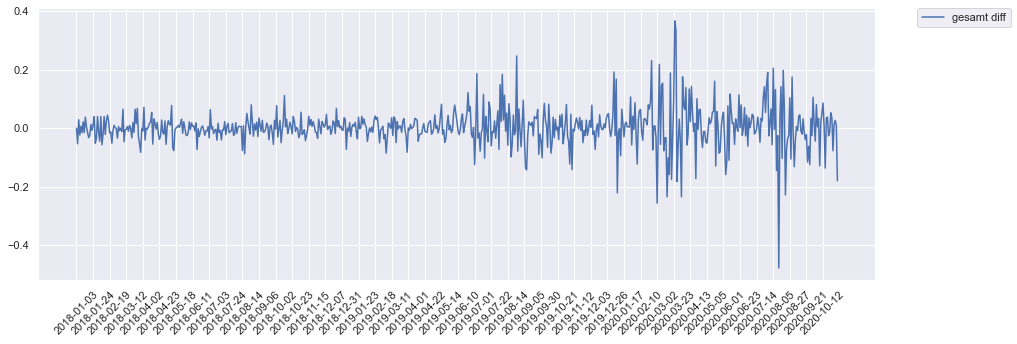

In [13]:
plt.figure(figsize = (15, 5))
plt.plot(gesdiff["selling"], label = "gesamt diff")
plt.xticks(np.arange(len(timestamp))[::15], timestamp[::15], rotation = '45')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

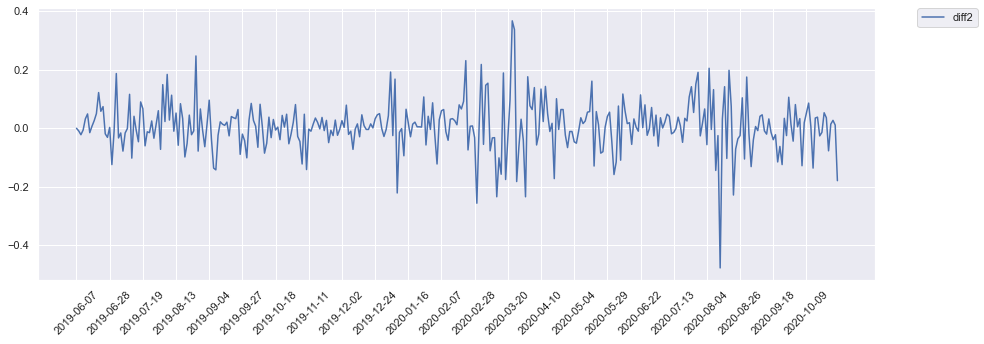

In [15]:
plt.figure(figsize = (15, 5))
plt.plot(diff2["selling2"], label = "diff2")
plt.xticks(np.arange(len(time2))[::15], time2[::15], rotation = '45')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [24]:
train_selling= selling[:628]
test_selling = selling[628:]

future_count = len(test_selling)
print(future_count)

train_selling_2nd_Half = Half2[:284]
test_selling_2nd_Half = Half2[284:]

future_count_2nd = len(test_selling_2nd_Half)
print(future_count_2nd)

61
61


In [26]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [27]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.compat.v1.nn.rnn_cell.LSTMCell(size_layer, state_is_tuple = False)

        rnn_cells = tf.compat.v1.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.compat.v1.nn.rnn_cell.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * 2 * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )


In [28]:
num_layers = 1
size_layer = 128
epoch = 500
dropout_rate = 0.6
skip = 10

In [33]:
from sklearn.preprocessing import MinMaxScaler
df = pd.DataFrame({'values': train_selling})
minmax = MinMaxScaler().fit(df)
df_log = minmax.transform(df)
df_log = pd.DataFrame(df_log)
print(df_log.head())

df2 = pd.DataFrame({'values': train_selling_2nd_Half})
minmax = MinMaxScaler().fit(df2)
df2_log = minmax.transform(df2)
df2_log = pd.DataFrame(df2_log)
print(df2_log.head())


          0
0  0.141029
1  0.126899
2  0.134631
3  0.128499
4  0.130365
          0
0  0.012358
1  0.009352
2  0.002004
3  0.000000
4  0.010688


In [34]:
modelnn = Model(
    learning_rate = 0.001, 
    num_layers = num_layers, 
    size = df_log.shape[1], 
    size_layer = size_layer, 
    output_size = df_log.shape[1], 
    forget_bias = dropout_rate
)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [35]:
%%time

for i in range(epoch):
    init_value = np.zeros((1, num_layers * 2 * size_layer))
    total_loss = 0
    for k in range(0, df_log.shape[0] - 1, skip):
        index = min(k + skip, df_log.shape[0] -1)
        batch_x = np.expand_dims(
            df_log.iloc[k : index, :].values, axis = 0
        )
        batch_y = df_log.iloc[k + 1 : index + 1, :].values
        last_state, _, loss = sess.run(
            [modelnn.last_state, modelnn.optimizer, modelnn.cost],
            feed_dict = {
                modelnn.X: batch_x,
                modelnn.Y: batch_y,
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        total_loss += loss
    total_loss /= ((df_log.shape[0] - 1) / skip)
    if (i + 1) % 100 == 0:
        print('epoch:', i + 1, 'avg loss:', total_loss)

epoch: 100 avg loss: 0.0012357455699729095
epoch: 200 avg loss: 0.000789817758111552
epoch: 300 avg loss: 0.0007510855193773471
epoch: 400 avg loss: 0.001033293869972275
epoch: 500 avg loss: 0.0007529201708308664
Wall time: 2min 15s


In [36]:
df = pd.DataFrame({'values': train_selling})
minmax = MinMaxScaler().fit(df)
df_log = minmax.transform(df)
df_log = pd.DataFrame(df_log)
future_day = future_count

output_predict = np.zeros((df_log.shape[0] + future_day, df_log.shape[1]))
output_predict[0] = df_log.iloc[0]
upper_b = (df_log.shape[0] // skip) * skip
init_value = np.zeros((1, num_layers * 2 * size_layer))
for k in range(0, (df_log.shape[0] // skip) * skip, skip):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(
                df_log.iloc[k : k + skip], axis = 0
            ),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[k + 1 : k + skip + 1] = out_logits

if upper_b < df_log.shape[0]:
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df_log.iloc[upper_b:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[upper_b + 1 : df_log.shape[0] + 1] = out_logits
    df_log.loc[df_log.shape[0]] = out_logits[-1]
    future_day = future_day - 1
    
for i in range(future_day):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df_log.iloc[-skip:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[df_log.shape[0]] = out_logits[-1]
    df_log.loc[df_log.shape[0]] = out_logits[-1]

In [50]:
df_log = minmax.inverse_transform(output_predict)
lstm_future = df_log[:,0]

array([5.897     , 5.77194172, 5.96301471, 5.89618487, 6.11453187,
       5.93030179, 6.04468595, 5.92970084, 5.98485294, 6.15972816,
       6.00757337, 6.04971681, 6.19815427, 6.33097555, 6.30325593,
       6.18199344, 6.23078625, 6.11391879, 6.05786379, 6.11234739,
       6.35443006, 6.16027701, 6.3276518 , 6.11198378, 6.18582044,
       6.03167363, 6.09484823, 6.13644693, 6.1809832 , 6.20675247,
       6.20419269, 6.18867824, 6.35118171, 6.35318908, 6.16584832,
       6.22601362, 6.20277896, 6.17674861, 6.35428631, 6.084915  ,
       6.31042399, 6.26172451, 6.66813689, 6.71511462, 6.68419162,
       6.69059472, 6.78132976, 6.68374566, 6.74594375, 6.86700815,
       6.71069657, 6.61489043, 6.60601036, 6.67662873, 6.67781671,
       6.9071585 , 6.87090679, 6.87486478, 6.90867118, 6.82136224,
       6.79234497, 6.96949105, 6.85711703, 6.72827425, 6.64686811,
       6.57091683, 6.62984177, 6.72169448, 6.57431214, 6.62490067,
       6.66452761, 6.7396089 , 6.79990063, 6.79565819, 6.76950

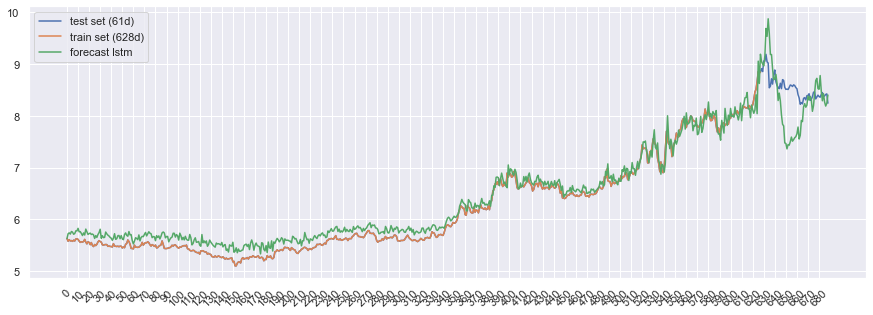

In [39]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(selling, label = 'test set (61d)')
ax.plot(train_selling, label = 'train set (628d)')
ax.plot(lstm_future, label='forecast lstm')
plt.xticks(
    np.arange(len(timestamp))[::10],
    np.arange(len(timestamp))[::10],
    rotation = '45',
)
plt.legend()
plt.show()

In [40]:
%%time

for i in range(epoch):
    init_value = np.zeros((1, num_layers * 2 * size_layer))
    total_loss = 0
    for k in range(0, df2_log.shape[0] - 1, skip):
        index = min(k + skip, df2_log.shape[0] -1)
        batch_x = np.expand_dims(
            df2_log.iloc[k : index, :].values, axis = 0
        )
        batch_y = df2_log.iloc[k + 1 : index + 1, :].values
        last_state, _, loss = sess.run(
            [modelnn.last_state, modelnn.optimizer, modelnn.cost],
            feed_dict = {
                modelnn.X: batch_x,
                modelnn.Y: batch_y,
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        total_loss += loss
    total_loss /= ((df2_log.shape[0] - 1) / skip)
    if (i + 1) % 100 == 0:
        print('epoch:', i + 1, 'avg loss:', total_loss)

epoch: 100 avg loss: 0.0011607170899525323
epoch: 200 avg loss: 0.0011534391079252658
epoch: 300 avg loss: 0.0016796888106678654
epoch: 400 avg loss: 0.002190461946863602
epoch: 500 avg loss: 0.0012927356838576113
Wall time: 1min 13s


In [44]:
df2 = pd.DataFrame({'values': train_selling_2nd_Half})
minmax = MinMaxScaler().fit(df2)
df2_log = minmax.transform(df2)
df2_log = pd.DataFrame(df2_log)
future_day = future_count

output_predict = np.zeros((df2_log.shape[0] + future_day, df2_log.shape[1]))
output_predict[0] = df2_log.iloc[0]
upper_b = (df2_log.shape[0] // skip) * skip
init_value = np.zeros((1, num_layers * 2 * size_layer))
for k in range(0, (df2_log.shape[0] // skip) * skip, skip):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(
                df2_log.iloc[k : k + skip], axis = 0
            ),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[k + 1 : k + skip + 1] = out_logits

if upper_b < df2_log.shape[0]:
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df2_log.iloc[upper_b:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[upper_b + 1 : df2_log.shape[0] + 1] = out_logits
    df2_log.loc[df2_log.shape[0]] = out_logits[-1]
    future_day = future_day - 1
    
for i in range(future_day):
    out_logits, last_state = sess.run(
        [modelnn.logits, modelnn.last_state],
        feed_dict = {
            modelnn.X: np.expand_dims(df2_log.iloc[-skip:], axis = 0),
            modelnn.hidden_layer: init_value,
        },
    )
    init_value = last_state
    output_predict[df2_log.shape[0]] = out_logits[-1]
    df2_log.loc[df2_log.shape[0]] = out_logits[-1]

In [51]:
df2_log = minmax.inverse_transform(output_predict)
lstm_future = df2_log[:,0]

array([8.911, 8.855, 9.06 , 9.056, 9.188, 9.044, 9.019, 8.542, 8.574,
       8.716, 8.613, 8.811, 8.886, 8.658, 8.587, 8.551, 8.526, 8.63 ,
       8.525, 8.7  , 8.682, 8.551, 8.511, 8.517, 8.509, 8.55 , 8.596,
       8.587, 8.567, 8.599, 8.585, 8.546, 8.524, 8.409, 8.347, 8.223,
       8.257, 8.232, 8.338, 8.352, 8.308, 8.389, 8.394, 8.427, 8.299,
       8.318, 8.371, 8.457, 8.463, 8.327, 8.362, 8.4  , 8.374, 8.36 ,
       8.413, 8.449, 8.372, 8.386, 8.413, 8.424, 8.245])

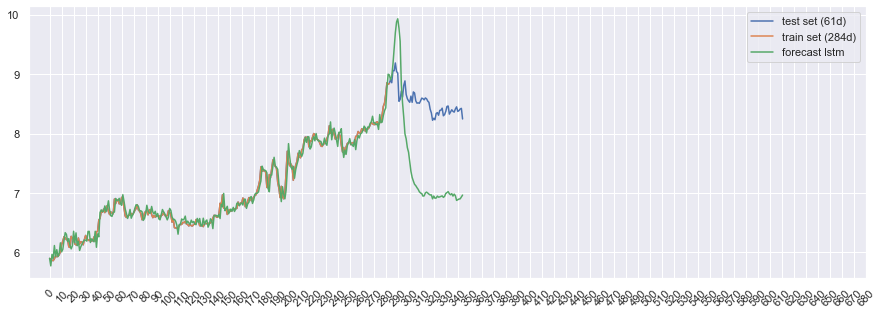

In [53]:
fig, ax = plt.subplots(figsize = (15, 5))
ax.plot(Half2, label = 'test set (61d)')
ax.plot(train_selling_2nd_Half, label = 'train set (284d)')
ax.plot(lstm_future, label='forecast lstm')
plt.xticks(
    np.arange(len(timestamp))[::10],
    np.arange(len(timestamp))[::10],
    rotation = '45',
)
plt.legend()
plt.show()